In [ ]:
import peptides
from peptides import Peptide
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd

# a bunch of simple functions to compute various peptide physiocochemical properties.
# Here, sequence == string representation of peptide sequence


def calculate_charge(sequence, ph=7.0):
    analyzed_protein = ProteinAnalysis(sequence)
    return analyzed_protein.charge_at_pH(ph)


def calculate_hydrophobicity(sequence, scale="Aboderin"):
    peptide = Peptide(sequence)
    return peptide.hydrophobicity(scale=scale)


def calculate_isoelectric_point(sequence):
    analyzed_protein = ProteinAnalysis(sequence)
    return analyzed_protein.isoelectric_point()


def calculate_molecular_weight(sequence):
    analyzed_protein = ProteinAnalysis(sequence)
    return analyzed_protein.molecular_weight()


def calculate_instability_index(sequence):
    analyzed_protein = ProteinAnalysis(sequence)
    return analyzed_protein.instability_index()


def calculate_gravy(sequence):
    analyzed_protein = ProteinAnalysis(sequence)
    return analyzed_protein.gravy()


def calculate_aliphatic_index(sequence):
    peptide = Peptide(sequence)
    return peptide.aliphatic_index()


def calculate_boman_index(sequence):
    peptide = Peptide(sequence)
    return peptide.boman()


def calculate_physicochemical_properties(sequence, ph=7.0):
    charge = calculate_charge(sequence)
    hydrophobicity = calculate_hydrophobicity(sequence)
    ip = calculate_isoelectric_point(sequence)
    mass = calculate_molecular_weight(sequence)
    instability = calculate_instability_index(sequence)
    gravy = calculate_gravy(sequence)
    aliphaticity = calculate_aliphatic_index(sequence)
    boman_index = calculate_boman_index(sequence)
    return (
        charge,
        hydrophobicity,
        ip,
        mass,
        instability,
        gravy,
        aliphaticity,
        boman_index,
    )

In [ ]:
import matplotlib.pyplot as plt


def plot_property_distributions(df, kind="hist", bins=30, figsize=(15, 8)):
    """
    Plot the distribution of physicochemical properties in a DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame where each column is a property and each row is a peptide.
        kind (str): Type of plot. One of {'hist', 'box', 'kde'}.
        bins (int): Number of bins for histograms.
        figsize (tuple): Size of the full figure.
    """
    if kind not in {"hist", "box", "kde"}:
        raise ValueError("kind must be one of {'hist', 'box', 'kde'}")

    n_cols = 3
    n_rows = -(-len(df.columns) // n_cols)  # ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        if kind == "hist":
            ax.hist(df[col].dropna(), bins=12, alpha=0.7)
        elif kind == "kde":
            df[col].dropna().plot(kind="kde", ax=ax)
        elif kind == "box":
            ax.boxplot(df[col].dropna(), vert=True)
            ax.set_xticklabels([col])
            continue
        ax.set_title(col)
        ax.grid(True)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()

In [ ]:
from Bio import SeqIO


def read_fasta_sequences(filepath):
    """
    Reads a FASTA file and returns a list of sequence strings.

    Parameters:
        filepath (str): Path to the FASTA file.

    Returns:
        List[str]: List of sequences as strings.
    """
    sequences = []
    for record in SeqIO.parse(filepath, "fasta"):
        sequences.append(str(record.seq))
    return sequences

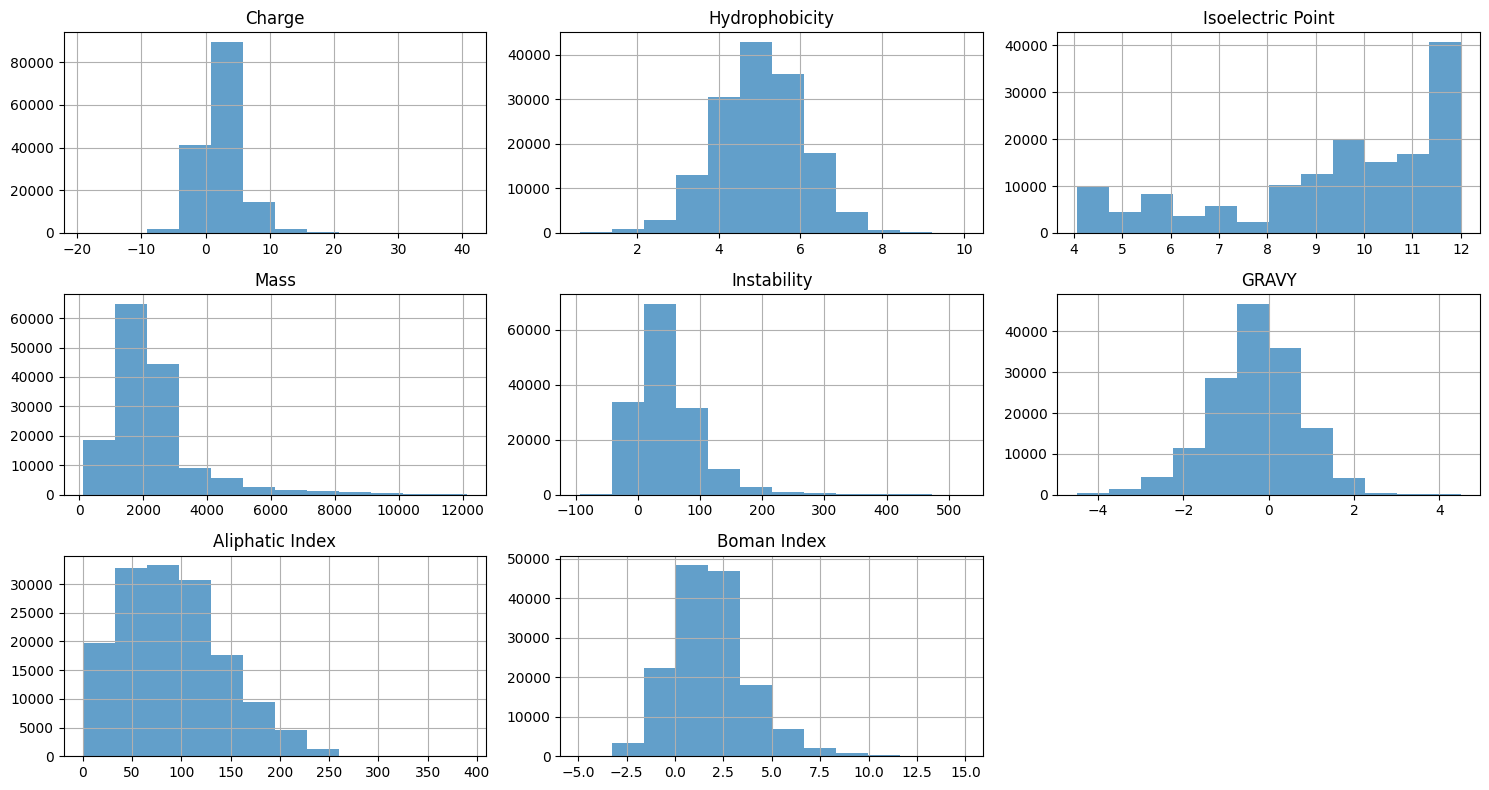

In [ ]:
fasta_path = "/home/aih/serra.korkmaz/projects/pepme/pepme/data/omegamp.fasta"
peptides = read_fasta_sequences(fasta_path)
# Compute properties and store in DataFrame
data = []
for seq in peptides:
    props = calculate_physicochemical_properties(seq)
    data.append(props)

columns = [
    "Charge",
    "Hydrophobicity",
    "Isoelectric Point",
    "Mass",
    "Instability",
    "GRAVY",
    "Aliphatic Index",
    "Boman Index",
]

df = pd.DataFrame(data, columns=columns)

# Plot distributions
plot_property_distributions(df, kind="hist")  # 'hist 'box' or 'kde'